In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:/Users/Jwpel/Downloads/heart_failure.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Exploratory Data Analysis

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'Death Counts')

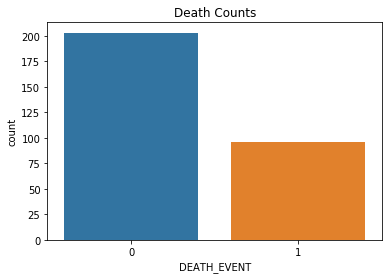

In [9]:
sns.countplot(df['DEATH_EVENT'])
plt.title('Death Counts')

In [10]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

Text(0.5, 1.0, 'Anaemia Count')

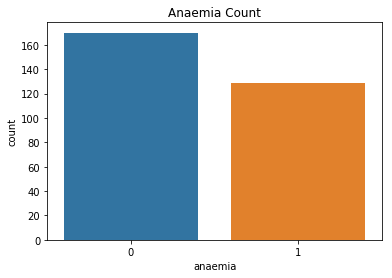

In [12]:
sns.countplot(df['anaemia'])
plt.title("Anaemia Count")

In [13]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Diabetes Count')

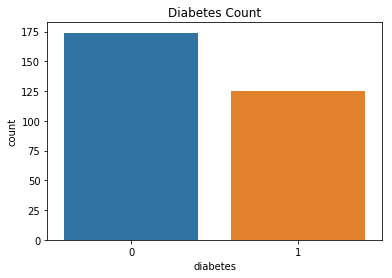

In [15]:
sns.countplot(df['diabetes'])
plt.title('Diabetes Count')

In [17]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

Text(0.5, 1.0, 'High Blood Pressure Count')

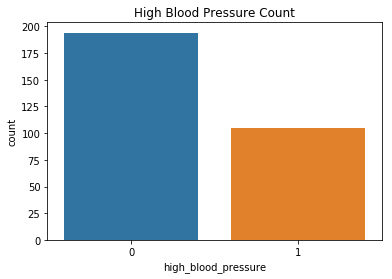

In [16]:
sns.countplot(df['high_blood_pressure'])
plt.title('High Blood Pressure Count')

C:\Users\Jwpel\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


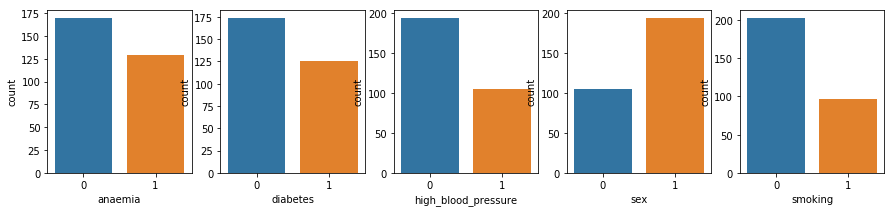

In [49]:
fig, ax =plt.subplots(ncols=5, figsize = (15,3))
sns.countplot(df['anaemia'], ax=ax[0])
sns.countplot(df['diabetes'], ax=ax[1])
sns.countplot(df['high_blood_pressure'], ax=ax[2])
sns.countplot(df['sex'], ax=ax[3])
sns.countplot(df['smoking'], ax=ax[4])
fig.show()

Text(0.5, 1.0, 'Age Histogram')

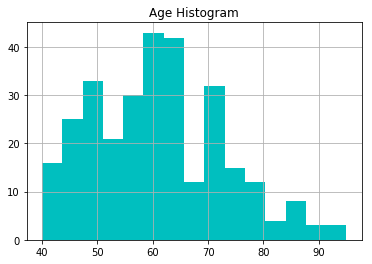

In [73]:
df['age'].hist(bins = 15, color = 'c')
plt.title("Age Histogram")

Text(0.5, 1.0, 'Creatinine Phosphokinase Histogram')

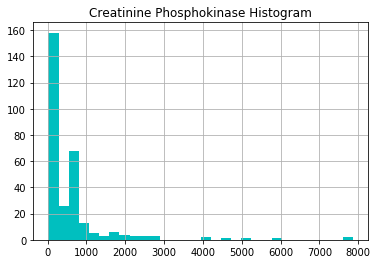

In [72]:
df['creatinine_phosphokinase'].hist(bins = 30, color = 'c')
plt.title("Creatinine Phosphokinase Histogram")

Text(0.5, 1.0, 'Ejection Fraction Histogram')

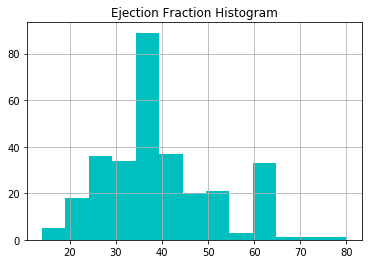

In [71]:
df['ejection_fraction'].hist(bins = 13, color = 'c')
plt.title("Ejection Fraction Histogram")

Text(0.5, 1.0, 'Platelets Histogram')

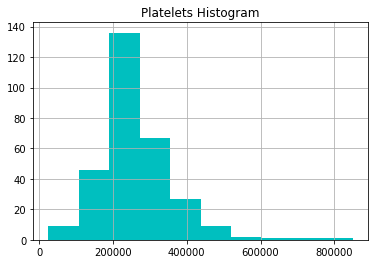

In [70]:
df['platelets'].hist(bins = 10, color = 'c')
plt.title("Platelets Histogram")

Text(0.5, 1.0, 'Serum Creatinine Histogram')

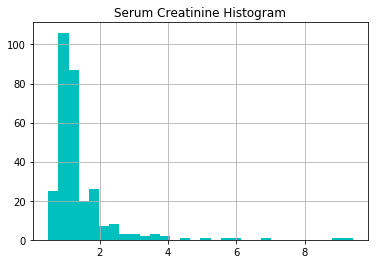

In [85]:
df['serum_creatinine'].hist(bins = 30, color = 'c')
plt.title("Serum Creatinine Histogram")

Text(0.5, 1.0, 'Serum Sodium Histogram')

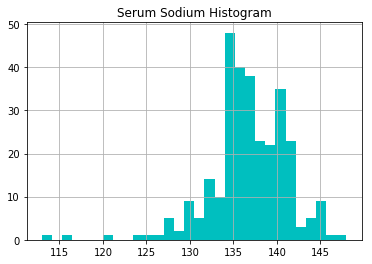

In [84]:
df['serum_sodium'].hist(bins = 30, color = 'c')
plt.title("Serum Sodium Histogram")

Text(0.5, 1.0, 'Time Histogram')

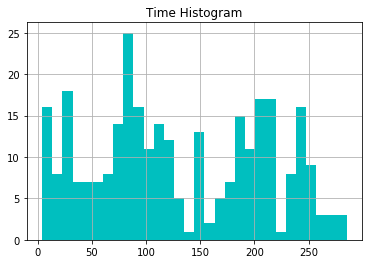

In [83]:
df['time'].hist(bins = 30, color = 'c')
plt.title("Time Histogram")

In [86]:
corr = df.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


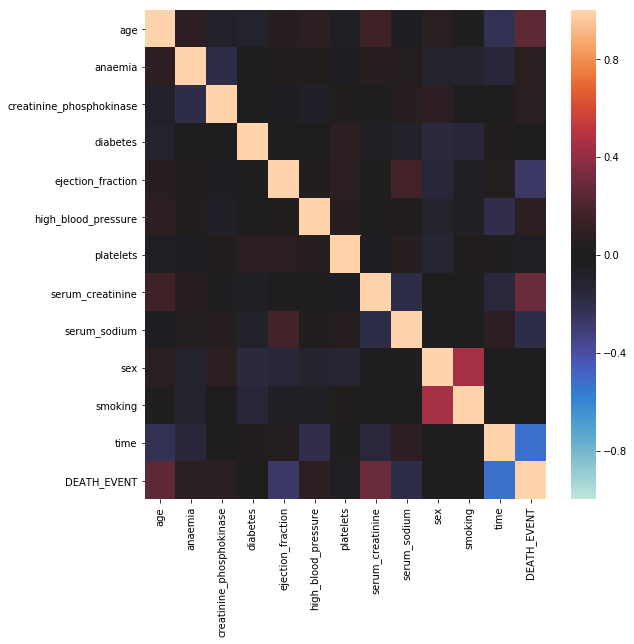

In [89]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin = -1.0, vmax = 1.0,
        center = 0, annot = False)

# Random Forest

In [4]:
# Create X and y values
X = df.drop(["DEATH_EVENT"], axis = 1)
y = df['DEATH_EVENT']

In [6]:
from sklearn.pipeline import Pipeline

In [52]:
rf = RandomForestClassifier()
scaler = MinMaxScaler()

In [54]:
# pipeline for gridsearch function
rf_pipe = Pipeline([('Scaler', scaler), ('RandomForest', rf)])
rf_params = {'RandomForest__n_estimators': [100, 200, 600],
             'RandomForest__max_features': [3,5,6]
             }

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 9)

In [70]:
# GridSearch model to optimize parameters, 8 crossfold
rf_grid = GridSearchCV(rf_pipe, param_grid = rf_params, cv = 8, scoring = "accuracy")
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__max_features': [3, 5, 6],
                         'RandomForest__n_estimators': [100, 200, 600]},
             scoring='accuracy')

In [72]:
rf_grid.cv_results_
rf_grid_results = pd.DataFrame(rf_grid.cv_results_)

In [73]:
rf_grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RandomForest__max_features,param_RandomForest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.302618,0.029911,0.021587,0.002671,3,100,"{'RandomForest__max_features': 3, 'RandomFores...",0.447368,0.789474,0.868421,0.837838,0.864865,0.729730,0.702703,0.675676,0.739509,0.130081,6
1,0.553292,0.019259,0.036019,0.002572,3,200,"{'RandomForest__max_features': 3, 'RandomFores...",0.447368,0.842105,0.921053,0.864865,0.891892,0.729730,0.729730,0.675676,0.762802,0.144780,1
2,1.645282,0.058536,0.098627,0.004096,3,600,"{'RandomForest__max_features': 3, 'RandomFores...",0.447368,0.842105,0.921053,0.864865,0.864865,0.756757,0.729730,0.675676,0.762802,0.141592,1
3,0.300190,0.032137,0.020029,0.003274,5,100,"{'RandomForest__max_features': 5, 'RandomFores...",0.342105,0.842105,0.894737,0.837838,0.918919,0.621622,0.729730,0.675676,0.732841,0.177525,9
4,0.580690,0.015370,0.036858,0.002378,5,200,"{'RandomForest__max_features': 5, 'RandomFores...",0.421053,0.842105,0.921053,0.837838,0.864865,0.648649,0.729730,0.675676,0.742621,0.151092,4
5,1.750825,0.085758,0.104935,0.018201,5,600,"{'RandomForest__max_features': 5, 'RandomFores...",0.342105,0.842105,0.921053,0.864865,0.891892,0.621622,0.729730,0.675676,0.736131,0.179696,8
6,0.289411,0.005073,0.019836,0.002619,6,100,"{'RandomForest__max_features': 6, 'RandomFores...",0.342105,0.842105,0.868421,0.891892,0.891892,0.648649,0.729730,0.675676,0.736309,0.174592,7
7,0.588324,0.020107,0.035526,0.002388,6,200,"{'RandomForest__max_features': 6, 'RandomFores...",0.447368,0.842105,0.921053,0.918919,0.891892,0.621622,0.729730,0.675676,0.756046,0.158161,3
8,1.719759,0.026681,0.098069,0.005711,6,600,"{'RandomForest__max_features': 6, 'RandomFores...",0.342105,0.842105,0.894737,0.891892,0.918919,0.621622,0.729730,0.675676,0.739598,0.182355,5


In [74]:
rf_grid.best_score_

0.7628022759601707

In [75]:
rf_grid.best_params_

{'RandomForest__max_features': 3, 'RandomForest__n_estimators': 200}

In [76]:
rf_pred = rf_grid.predict(X_test)

In [78]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc

1.0

In [79]:
rf_conf = confusion_matrix(y_test, rf_pred)
rf_conf

array([[45,  0],
       [ 0, 15]], dtype=int64)

In [80]:
rf_conf = pd.DataFrame(data = rf_conf, columns = [['Pred:No Failure', 'Pred: Failure']], index = [['Act: No Failure', 'Act: Failure']])

Text(0.5, 1.0, 'RF Confusion Matrix')

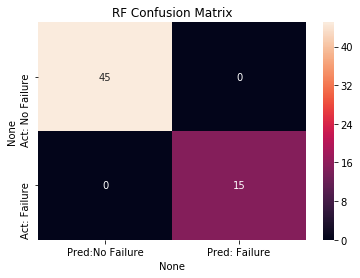

In [166]:
sns.heatmap(rf_conf, annot = True)
plt.title("RF Confusion Matrix")

In [147]:
rf_fn= rf_conf.iloc[1,0]
rf_fn

0

In [148]:
rf_tp = rf_conf.iloc[1,1]
rf_tp

15

In [150]:
# assigning precision value
rf_prec = rf_tp/(rf_fn + rf_tp)
rf_prec

1.0

# Support Vector Machine

In [90]:
svc = svm.SVC()
svc_pipe = Pipeline([('Scaler', scaler), ('svc', svc )])

In [92]:
gamma_range = range(1,10)
c_range = range(1,10)

In [94]:
svc_params = dict(svc__gamma = gamma_range, svc__C = c_range)

In [95]:
svc_grid = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 8, scoring = "accuracy", n_jobs=-1)

In [96]:
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': range(1, 10), 'svc__gamma': range(1, 10)},
             scoring='accuracy')

In [97]:
svc_results = pd.DataFrame(svc_grid.cv_results_)

In [98]:
svc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016411,0.002130,0.008141,0.004299,1,1,"{'svc__C': 1, 'svc__gamma': 1}",0.633333,0.900000,0.800000,0.833333,0.766667,0.700000,0.733333,0.793103,0.769971,0.076875,7
1,0.017976,0.001864,0.008084,0.002478,1,2,"{'svc__C': 1, 'svc__gamma': 2}",0.633333,0.833333,0.700000,0.833333,0.800000,0.766667,0.733333,0.793103,0.761638,0.065029,11
2,0.018637,0.001615,0.010983,0.007483,1,3,"{'svc__C': 1, 'svc__gamma': 3}",0.600000,0.800000,0.633333,0.800000,0.766667,0.700000,0.666667,0.793103,0.719971,0.075397,20
3,0.024575,0.008084,0.006758,0.001382,1,4,"{'svc__C': 1, 'svc__gamma': 4}",0.600000,0.733333,0.633333,0.766667,0.766667,0.700000,0.666667,0.793103,0.707471,0.064978,23
4,0.023787,0.010712,0.006425,0.001670,1,5,"{'svc__C': 1, 'svc__gamma': 5}",0.600000,0.733333,0.633333,0.733333,0.766667,0.666667,0.666667,0.724138,0.690517,0.053848,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.019016,0.003949,0.007272,0.002981,9,5,"{'svc__C': 9, 'svc__gamma': 5}",0.566667,0.766667,0.666667,0.766667,0.666667,0.633333,0.700000,0.758621,0.690661,0.067149,29
77,0.023472,0.006340,0.006123,0.005251,9,6,"{'svc__C': 9, 'svc__gamma': 6}",0.566667,0.733333,0.666667,0.800000,0.666667,0.633333,0.700000,0.724138,0.686351,0.065810,40
78,0.023159,0.006252,0.006632,0.001788,9,7,"{'svc__C': 9, 'svc__gamma': 7}",0.566667,0.733333,0.633333,0.766667,0.700000,0.633333,0.666667,0.724138,0.678017,0.061288,57
79,0.023390,0.005419,0.009209,0.008292,9,8,"{'svc__C': 9, 'svc__gamma': 8}",0.566667,0.766667,0.600000,0.766667,0.700000,0.600000,0.666667,0.689655,0.669540,0.071118,66


In [99]:
svc_grid.best_score_

0.8034482758620689

In [100]:
svc_grid.best_params_

{'svc__C': 3, 'svc__gamma': 1}

In [101]:
svc_pred = svc_grid.predict(X_test)

In [102]:
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc

0.8

In [103]:
svc_conf = confusion_matrix(y_test, svc_pred)
svc_conf

array([[39,  6],
       [ 6,  9]], dtype=int64)

In [152]:
svc_conf = pd.DataFrame(data = svc_conf, columns = [['Pred:No Failure', 'Pred: Failure']], index = [['Act: No Failure', 'Act: Failure']])

Text(0.5, 1.0, 'SVC Confusion Maxtrix')

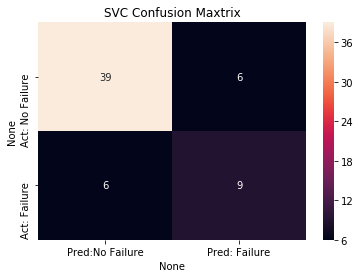

In [167]:
sns.heatmap(svc_conf, annot = True)
plt.title("SVC Confusion Maxtrix")

In [154]:
svc_fn = svc_conf.iloc[1,0]
svc_fn

6

In [155]:
svc_tp = svc_conf.iloc[1,1]
svc_tp

9

In [156]:
svc_prec = svc_tp/(svc_tp + svc_fn)
svc_prec

0.6

# Artificial Neural Network

In [108]:
mlp = MLPClassifier()
mlp_pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

In [110]:
mlp_params = {'mlp__solver': ['sgd'],
              'mlp__hidden_layer_sizes': [(10,10,10),(15,15,15),(20,20,20),(30,30,30),(40,40,40)],
              'mlp__max_iter': [2000,6000,8000,10000]
             }

In [111]:
mlp_grid = GridSearchCV(mlp_pipe, param_grid = mlp_params, cv=8, scoring = "accuracy", n_jobs=-1)

In [112]:
mlp_grid.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('mlp', MLPClassifier())]),
             n_jobs=-1,
             param_grid={'mlp__hidden_layer_sizes': [(10, 10, 10), (15, 15, 15),
                                                     (20, 20, 20), (30, 30, 30),
                                                     (40, 40, 40)],
                         'mlp__max_iter': [2000, 6000, 8000, 10000],
                         'mlp__solver': ['sgd']},
             scoring='accuracy')

In [113]:
mlp_results = pd.DataFrame(mlp_grid.cv_results_)

In [114]:
mlp_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__hidden_layer_sizes,param_mlp__max_iter,param_mlp__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.535470,0.275741,0.007810,0.001611,"(10, 10, 10)",2000,sgd,"{'mlp__hidden_layer_sizes': (10, 10, 10), 'mlp...",0.633333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.655172,0.661063,0.011136,20
1,0.945511,1.373988,0.007726,0.002399,"(10, 10, 10)",6000,sgd,"{'mlp__hidden_layer_sizes': (10, 10, 10), 'mlp...",0.633333,0.666667,0.666667,0.833333,0.666667,0.666667,0.666667,0.689655,0.686207,0.057405,18
2,1.202930,1.251821,0.007020,0.001972,"(10, 10, 10)",8000,sgd,"{'mlp__hidden_layer_sizes': (10, 10, 10), 'mlp...",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.766667,0.655172,0.677730,0.033825,19
3,1.822175,1.449037,0.006512,0.001959,"(10, 10, 10)",10000,sgd,"{'mlp__hidden_layer_sizes': (10, 10, 10), 'mlp...",0.633333,0.866667,0.666667,0.666667,0.800000,0.666667,0.766667,0.689655,0.719540,0.076691,15
4,2.495062,1.411233,0.005175,0.001295,"(15, 15, 15)",2000,sgd,"{'mlp__hidden_layer_sizes': (15, 15, 15), 'mlp...",0.666667,0.866667,0.666667,0.766667,0.866667,0.666667,0.700000,0.655172,0.731897,0.084560,14
5,1.954430,1.879643,0.007318,0.002321,"(15, 15, 15)",6000,sgd,"{'mlp__hidden_layer_sizes': (15, 15, 15), 'mlp...",0.800000,0.666667,0.833333,0.666667,0.666667,0.666667,0.733333,0.655172,0.711063,0.065540,16
6,1.669998,1.557525,0.008542,0.006608,"(15, 15, 15)",8000,sgd,"{'mlp__hidden_layer_sizes': (15, 15, 15), 'mlp...",0.633333,0.966667,0.666667,0.666667,0.833333,0.666667,0.666667,0.827586,0.740948,0.112162,9
7,1.486497,1.391312,0.006707,0.001863,"(15, 15, 15)",10000,sgd,"{'mlp__hidden_layer_sizes': (15, 15, 15), 'mlp...",0.633333,0.666667,0.866667,0.666667,0.666667,0.666667,0.766667,0.655172,0.698563,0.073403,17
8,2.660497,1.545063,0.007669,0.001946,"(20, 20, 20)",2000,sgd,"{'mlp__hidden_layer_sizes': (20, 20, 20), 'mlp...",0.633333,0.666667,0.900000,0.833333,0.833333,0.766667,0.666667,0.758621,0.757328,0.089311,8
9,3.559714,1.192686,0.006318,0.002217,"(20, 20, 20)",6000,sgd,"{'mlp__hidden_layer_sizes': (20, 20, 20), 'mlp...",0.666667,0.666667,0.866667,0.833333,0.866667,0.733333,0.700000,0.827586,0.770115,0.081866,5


In [115]:
mlp_grid.best_score_

0.8202586206896552

In [116]:
mlp_grid.best_params_

{'mlp__hidden_layer_sizes': (40, 40, 40),
 'mlp__max_iter': 2000,
 'mlp__solver': 'sgd'}

In [117]:
mlp_pred = mlp_grid.predict(X_test)

In [118]:
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_acc

0.85

In [119]:
mlp_conf = confusion_matrix(y_test, mlp_pred)
mlp_conf

array([[40,  5],
       [ 4, 11]], dtype=int64)

In [120]:
mlp_conf = pd.DataFrame(data = mlp_conf, columns = [['Pred:No Failure', 'Pred: Failure']], index = [['Act: No Failure', 'Act: Failure']])

Text(0.5, 1.0, 'MLP Confusion Matrix')

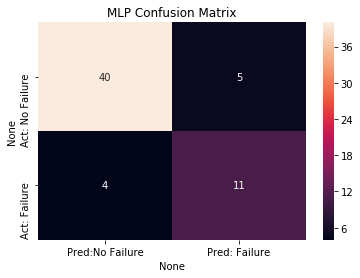

In [168]:
sns.heatmap(mlp_conf, annot = True)
plt.title("MLP Confusion Matrix")

In [157]:
mlp_fn = mlp_conf.iloc[1,0]
mlp_fn

4

In [159]:
mlp_tp = mlp_conf.iloc[1,1]
mlp_tp

11

In [160]:
mlp_prec = mlp_tp/(mlp_tp + mlp_fn)
mlp_prec

0.7333333333333333

In [162]:
results = pd.DataFrame({'Model': ['Random Forest',
                                  'Support Vector Machine',
                                  'Artifical Neural Network'],
                        'Accuracy': [rf_acc,
                                     svc_acc,
                                     mlp_acc],
                        'Precision': [rf_prec,
                                    svc_prec,
                                    mlp_prec]
                       })

In [163]:
results = results.set_index("Model")

In [164]:
results = results.sort_values(by="Precision", ascending = False)

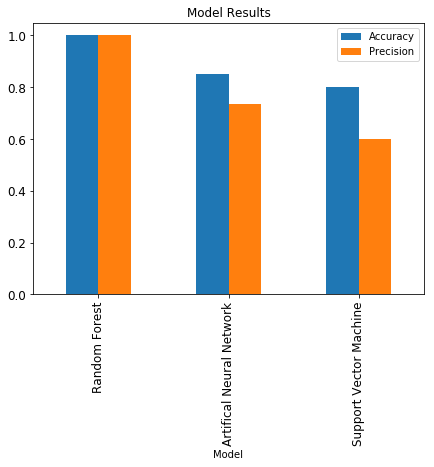

In [165]:
ax = results.plot(kind = 'bar', title = "Model Results", figsize = (7,5), legend = True, fontsize = 12)